In [6]:
import pandas as pd
import seaborn as sns

In [2]:
health = pd.read_csv('../../../data_final/health_data_final.csv')

In [5]:
health['Indicator Name'].unique()

array(['Under 75 Resp Disease Mortality Rate',
       'Pneumonia (all mentions) Mortality Rate',
       'COPD (contributory cause) Mortality Rate',
       '<75 Coronary Heart Disease Mortality Rate',
       'Asthma Mortality Rate', 'Hypertension Prevalence',
       'Diabetes Prevalence', 'CHD Prevalence',
       'Heart Failure Prevalence', 'CKD Prevalence', 'Stroke: Prevalence',
       'Atrial Fibrillation Prevalence', 'COPD Prevalence',
       'Asthma Prevalence', 'COPD Admissions', 'Respiratory Admissions',
       'Respiratory Tract Admissions 1yr',
       'Respiratory Tract Admissions U1yr', 'Asthma Admissions Over 19yr',
       'Asthma Admissions Under 19yr', 'Pneumonia Admissions',
       'CHD Admissions', 'Heart Failure Admissions', 'Stroke Admissions',
       'Stroke Atrial Fib Admissions'], dtype=object)

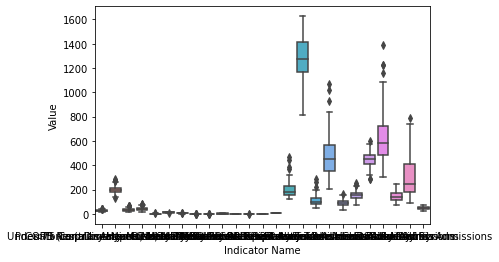

In [9]:
ax = sns.boxplot(x="Indicator Name", y="Value", data=health)

In [10]:
# get the distributions??

# We will take quantiles ourselves for now...
# 80 = upper, 30 = lower and everything else is MEDIUM

haha = {}

for indicator in health['Indicator Name'].unique():
    tmp = health.copy()
    tmp = tmp[tmp['Indicator Name']== indicator]
    lower = tmp['Value'].quantile(0.3)
    upper = tmp['Value'].quantile(0.8)
    haha[indicator] = {'lower': lower, 'upper':upper}
    
print(haha)

{'Under 75 Resp Disease Mortality Rate': {'lower': 25.76212504872514, 'upper': 32.746}, 'Pneumonia (all mentions) Mortality Rate': {'lower': 185.2684247173936, 'upper': 221.62443991309203}, 'COPD (contributory cause) Mortality Rate': {'lower': 29.013337611089383, 'upper': 42.05388038868183}, '<75 Coronary Heart Disease Mortality Rate': {'lower': 34.524, 'upper': 51.146}, 'Asthma Mortality Rate': {'lower': 1.7642889700947033, 'upper': 3.1492891295828924}, 'Hypertension Prevalence': {'lower': 10.69897906723484, 'upper': 12.6787877672421}, 'Diabetes Prevalence': {'lower': 4.778531252462799, 'upper': 6.317884385938564}, 'CHD Prevalence': {'lower': 2.183171031105558, 'upper': 2.627430773087856}, 'Heart Failure Prevalence': {'lower': 0.47244427733175465, 'upper': 0.590545622059744}, 'CKD Prevalence': {'lower': 2.58616606289626, 'upper': 3.5978852814869917}, 'Stroke: Prevalence': {'lower': 1.03810324000569, 'upper': 1.5311412303027923}, 'Atrial Fibrillation Prevalence': {'lower': 1.0930930252

In [14]:
# remove the nan health indicators (only two)
health.isna().sum()
health.dropna(subset=['Value'], inplace=True)
health.isna().sum()

Unnamed: 0           0
Year                 0
Indicator Type       0
Indicator Name       0
Area Name            0
Radius Location      0
Value                0
heathrow_distance    0
LAT                  0
LONG                 0
dtype: int64

In [36]:
def please_classify_health_indicators(row):
        
    low_limit = haha[row['Indicator Name']]['lower']
    up_limit = haha[row['Indicator Name']]['upper']


#     value = float(row['Value'])
    
    if row['Value'] < low_limit:
        return 'LOWER'
    elif row['Value'] > up_limit:
        return 'HIGH'
    else:
        return 'MEDIUM'



In [37]:
health['category'] = health.apply(please_classify_health_indicators, axis=1)

In [42]:
health.isna().sum()

health.category.value_counts()

MEDIUM    2028
LOWER     1230
HIGH       818
Name: category, dtype: int64

In [43]:
health.head(1)

,Unnamed: 0,Year,Indicator Type,Indicator Name,Area Name,Radius Location,Value,heathrow_distance,LAT,LONG,category
0,0,2006,Health - Mortality,Under 75 Resp Disease Mortality Rate,NHS Ealing CCG,Inner,38.388443,11465.53093,51.5244,-0.31405,HIGH


In [44]:
health.to_csv('health_categorised.csv', encoding='utf-8')